In [1]:
import os
import pandas as pd

import sklearn
from lightgbm import LGBMRegressor, LGBMClassifier
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

import matplotlib.pyplot as plt

In [2]:
# from get_prices import download_parquets
# download_parquets()

In [3]:
assets = pd.read_csv('../src/data/assets.txt').columns.tolist()
assets

['AA', 'HDB', 'INDA', 'EPI']

In [4]:
os.listdir('./prices')

['AA_2024_07_12.parquet',
 'EPI_2024_07_12.parquet',
 'HDB_2024_07_12.parquet',
 'INDA_2024_07_12.parquet']

In [5]:
df = pd.read_parquet('./prices/HDB_2024_07_12.parquet')
df = df[df.marketState == 'REGULAR']
df = df.set_index('regularMarketTime')

In [6]:
df.columns

Index(['symbol', 'quoteType', 'marketState', 'regularMarketChangePercent',
       'regularMarketPrice', 'regularMarketChange', 'regularMarketOpen',
       'regularMarketDayHigh', 'regularMarketDayLow', 'regularMarketVolume',
       'bid', 'ask', 'bidSize', 'askSize', 'fiftyTwoWeekLowChange',
       'fiftyTwoWeekLowChangePercent', 'fiftyTwoWeekHighChange',
       'fiftyTwoWeekHighChangePercent', 'trailingPE', 'priceEpsCurrentYear',
       'fiftyDayAverageChange', 'fiftyDayAverageChangePercent',
       'twoHundredDayAverageChange', 'twoHundredDayAverageChangePercent',
       'marketCap', 'forwardPE', 'priceToBook'],
      dtype='object')

In [7]:
X = df.drop(['symbol', 'marketState', 'quoteType'], axis=1).shift(1).dropna(how='all', axis=0)
X

,regularMarketChangePercent,regularMarketPrice,regularMarketChange,regularMarketOpen,regularMarketDayHigh,regularMarketDayLow,regularMarketVolume,bid,ask,bidSize,...,fiftyTwoWeekHighChangePercent,trailingPE,priceEpsCurrentYear,fiftyDayAverageChange,fiftyDayAverageChangePercent,twoHundredDayAverageChange,twoHundredDayAverageChangePercent,marketCap,forwardPE,priceToBook
regularMarketTime,,,,,,,,,,,,,,,,,,,,,
2024-07-12 09:30:38Z,-0.066271,60.320,-0.040001,60.39,60.89,60.17,3127956.0,60.53,60.94,9.0,...,-0.155064,18.968554,22.507462,0.768200,0.012900,1.586250,0.027007,1.529739e+11,19.210190,0.100391
2024-07-12 09:31:45Z,0.613394,60.690,0.369999,60.39,60.81,60.61,65900.0,60.53,60.95,9.0,...,-0.149881,19.084906,22.645521,1.138199,0.019113,1.956249,0.033307,1.539123e+11,19.328024,0.101007
2024-07-12 09:32:44Z,0.563661,60.660,0.340000,60.39,60.81,60.61,73788.0,60.53,60.95,9.0,...,-0.150301,19.075472,22.634327,1.108200,0.018609,1.926251,0.032796,1.538362e+11,19.318470,0.100957
2024-07-12 09:33:33Z,0.563661,60.660,0.340000,60.39,60.81,60.60,76597.0,60.53,60.95,9.0,...,-0.150301,19.075472,22.634327,1.108200,0.018609,1.926251,0.032796,1.538362e+11,19.318470,0.100957
2024-07-12 09:34:52Z,0.447613,60.590,0.270000,60.39,60.81,60.59,81837.0,60.53,60.94,9.0,...,-0.151282,19.053460,22.608208,1.038200,0.017434,1.856251,0.031605,1.536587e+11,19.296177,0.100841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-12 15:55:00Z,0.223810,60.455,0.135002,60.81,60.81,60.23,1147689.0,60.55,60.55,8.0,...,-0.153173,19.011007,22.557837,0.903202,0.015167,1.721252,0.029306,1.533163e+11,19.253185,0.100616
2024-07-12 15:55:59Z,0.198937,60.440,0.119999,60.81,60.81,60.23,1160111.0,60.54,60.55,8.0,...,-0.153383,19.006289,22.552238,0.888199,0.014915,1.706249,0.029051,1.532783e+11,19.248407,0.100591
2024-07-12 15:56:54Z,0.265252,60.480,0.160000,60.81,60.81,60.23,1186198.0,60.51,60.52,8.0,...,-0.152823,19.018867,22.567163,0.928200,0.015586,1.746250,0.029732,1.533797e+11,19.261147,0.100658


In [8]:
y = df[['regularMarketChangePercent']].iloc[1:]
y

,regularMarketChangePercent
regularMarketTime,
2024-07-12 09:30:38Z,0.613394
2024-07-12 09:31:45Z,0.563661
2024-07-12 09:32:44Z,0.563661
2024-07-12 09:33:33Z,0.447613
2024-07-12 09:34:52Z,0.422747
...,...
2024-07-12 15:55:00Z,0.198937
2024-07-12 15:55:59Z,0.265252
2024-07-12 15:56:54Z,0.223810


In [9]:
lgbr = LGBMRegressor()
lgbr.fit(X[:300], y[:300])

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000194 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 890
[LightGBM] [Info] Number of data points in the train set: 300, number of used features: 22
[LightGBM] [Info] Start training from score 0.362912
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


LGBMRegressor()

In [10]:
lgbr.score(X[300:], y[300:])

0.7203609112481062

In [11]:
y[300:].reset_index(drop=True)

,regularMarketChangePercent
0,0.381299
1,0.397881
2,0.414456
3,0.397881
4,0.389590
...,...
83,0.198937
84,0.265252
85,0.223810
86,0.273543


In [12]:
y_pred = pd.Series(lgbr.predict(X[300:]), name='y_pred')
pd.concat([y_pred, y[300:].reset_index(drop=True)], axis=1)

,y_pred,regularMarketChangePercent
0,0.386049,0.381299
1,0.382819,0.397881
2,0.386049,0.414456
3,0.455803,0.397881
4,0.386049,0.389590
...,...,...
83,0.219043,0.198937
84,0.229809,0.265252
85,0.323538,0.223810
86,0.236523,0.273543


<Axes: >

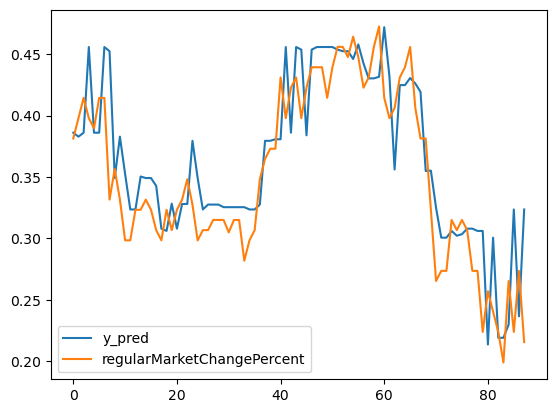

In [13]:
pd.concat([y_pred, y[300:].reset_index(drop=True)], axis=1).plot()

C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\pmdarima\arima\_validation.py:62: UserWarning: m (1440) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-1079.674, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-1080.208, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-1080.241, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-1081.574, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-1078.205, Time=0.06 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.400 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  300
Model:               SARIMAX(0, 1, 0)   Log Likelihood                 541.787
Date:                Sat, 13 Jul 2024   AIC                          -1081.574
Time:                        10:36:40   BIC                          -1077.874
Sample:                             0   HQIC                         -1080.093
                                - 300                                  

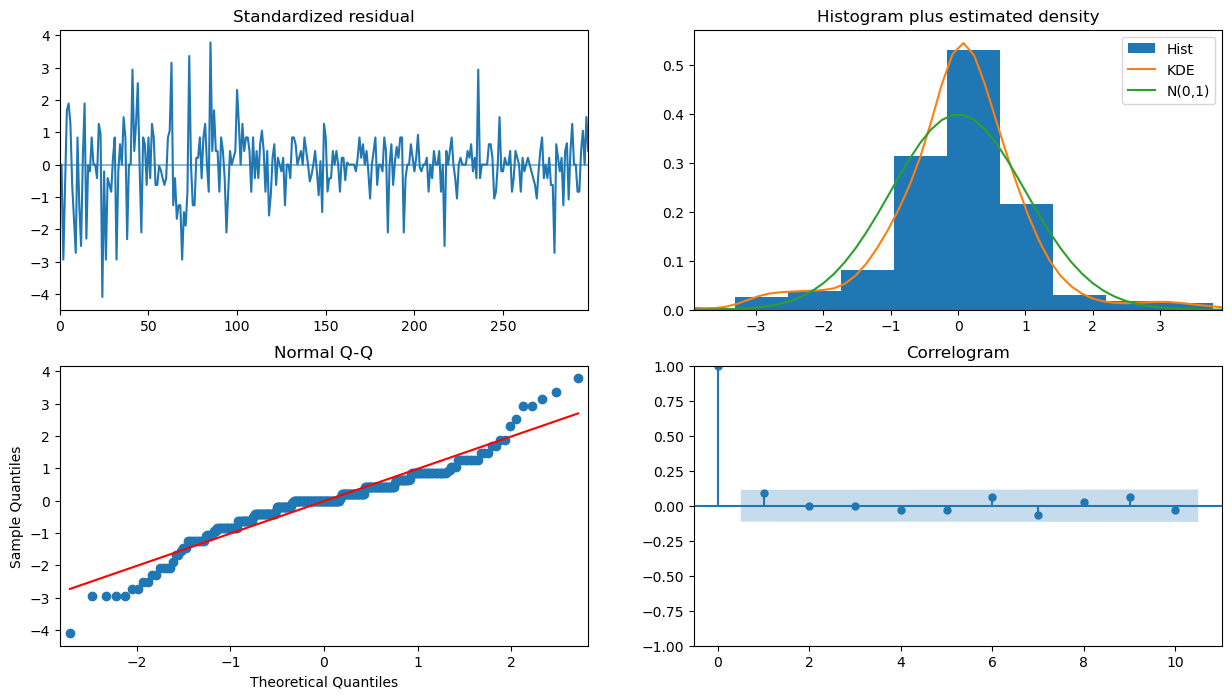

In [14]:
model_autoARIMA = auto_arima(y[:300], start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=60*24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [18]:
fc_series

regularMarketTime
2024-07-12 14:31:00    0.397165
2024-07-12 14:32:00    0.408001
2024-07-12 14:33:00    0.409245
2024-07-12 14:34:00    0.407391
2024-07-12 14:35:00    0.394575
                         ...   
2024-07-12 15:55:00    0.193339
2024-07-12 15:55:00    0.193339
2024-07-12 15:56:00    0.176700
2024-07-12 15:57:00    0.174163
2024-07-12 15:58:00         NaN
Name: predicted_mean, Length: 88, dtype: float64

C:\Users\shubh\AppData\Local\Temp\ipykernel_10500\4017321846.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  X.index = pd.to_datetime(X.index).to_period('min')
C:\Users\shubh\AppData\Local\Temp\ipykernel_10500\4017321846.py:2: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  y.index = pd.to_datetime(y.index).to_period('min')
C:\Users\shubh\miniconda3\envs\ibstock\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


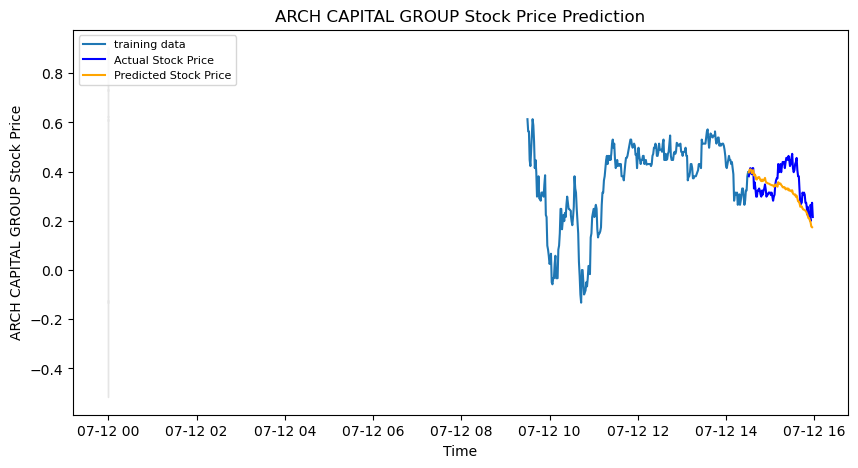

In [15]:
X.index = pd.to_datetime(X.index).to_period('min')
y.index = pd.to_datetime(y.index).to_period('min')
model = ARIMA(y[:300], order=(1,1,2), exog=X[:300])  
fitted = model.fit()
ff = fitted.get_forecast(len(y[300:]), exog=X[300:])  # 95% conf
fc, se, conf = ff.predicted_mean, ff.se_mean, ff.conf_int()

# Make as pandas series
fc_series = pd.Series(fc, index=y[300:].index)
lower_series = pd.Series(conf.iloc[:, 0], index=y[300:].index)
upper_series = pd.Series(conf.iloc[:, 1], index=y[300:].index)
# Plot
plt.figure(figsize=(10,5), dpi=100)
y.index = y.index.to_timestamp()
fc_series.index = fc_series.index.to_timestamp()
plt.plot(y[:300], label='training data')
plt.plot(y[300:], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index.to_timestamp(), lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [28]:
pd.concat([fc.reset_index(drop=True), y[300:].reset_index(drop=True)], axis=1).head(50)

,predicted_mean,regularMarketChangePercent
0,0.403916,0.381299
1,0.397165,0.397881
2,0.408001,0.414456
3,0.409245,0.397881
4,0.407391,0.389590
5,0.394575,0.414456
6,0.403390,0.414388
7,0.405887,0.331566
8,0.384608,0.356433
9,0.389312,0.331566


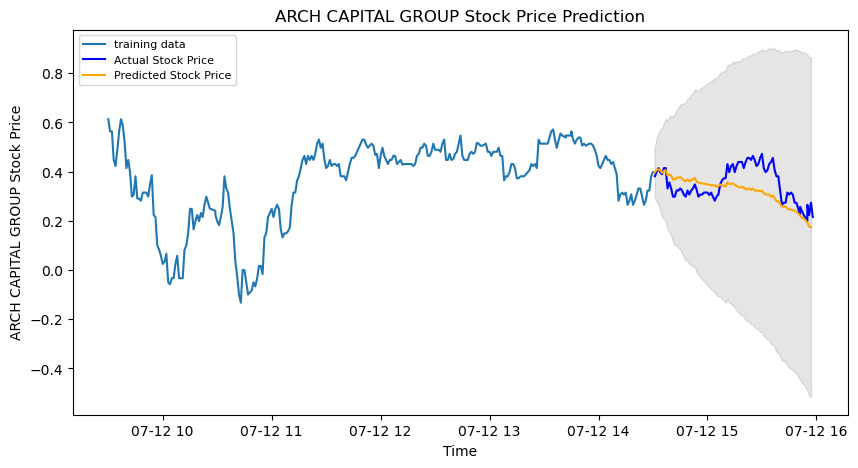

In [23]:
plt.figure(figsize=(10,5), dpi=100)
plt.plot(y[:300], label='training data')
plt.plot(y[300:], color = 'blue', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index.to_timestamp(), lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('ARCH CAPITAL GROUP Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('ARCH CAPITAL GROUP Stock Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()